In [1]:
%matplotlib inline

# Dimensionality Reduction
### Final Project | PH 464

Explore dimensionality reduction of Hamidieh's data using PCA and visualize the results.

In [2]:
# Library imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sb; sb.set()

In [3]:
# Import data from pickle file
from os import path

FILES = ['element_data.pkl', 'train.pkl', 'unique_m.pkl']
for i, fi in enumerate(FILES):
    FILES[i] = path.abspath(path.join('pickle', fi))
    
DATA = {}

for f in FILES:
    DATA.update({str(path.splitext(path.basename(f))[0]) : pd.read_pickle(f)})

In [4]:
# Grab the unique_m dataset
data = DATA['unique_m']

# Drop the material column from the dataset, because PCA won't know what to do with that string
data = data.drop('material', axis = 1)

# Slice the critical temp column into its own series... It's effectively our target data
target = data.loc[:, 'critical_temp']
data = data.drop('critical_temp', axis = 1)

## Principal Component Analysis
One method for dimensionality reduction is Principal Component Analysis (PCA), implemented nicely for us in the SkLearn library.

In [5]:
from sklearn.decomposition import PCA

Hamidieh reported little success with PCA on this dataset because the approach required a large number of principal components to predict well. Start by writing up some code to work with few principal components (2 or 3), make sure the code works, then scale up to see if we can make a good model with PCA.

In [16]:
pca = PCA(2)
projection = pca.fit_transform(data)

print data.shape
print projection.shape

(21263, 86)
(21263, 2)


We can see how the PCA transform reduced the data from 87 dimensions to 2, while keeping 21263 samples in the dataset.

With a two-dimensional dataset, we can easily make a scatter plot of the data.

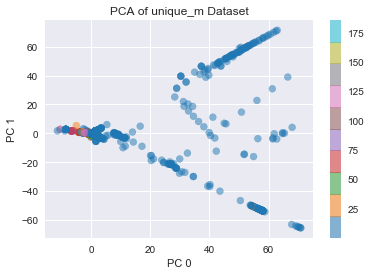

In [17]:
plt.scatter(projection[:, 0], projection[:, 1],
            c = target, alpha = 0.5,
            cmap = plt.cm.tab10)
plt.xlabel("PC 0")
plt.ylabel("PC 1")
plt.title("PCA of unique_m Dataset")
plt.colorbar()

At this time, I haven't figured out how to retain the feature names after PCA is run. It would be nice in the future, however, to be able to identify the components that PCA found to be the most important in a dataset like this where the features are meaningful (unlike the numbers dataset, where the features are kind of abstract).

Next steps:
+ Find some quantifiers for this model (score? CV? What built-in methods are there for this class?)
+ Increase the number of components, check quantifier
+ Find some optimal number of components to model this data